## Задание
Дан массив данных
X = np.array([[5,3],
[10,15],
[15,12],
[24,10],
[30,45],
[85,70],
[71,80],
[60,78],
[55,52],
[80,91],])
Требуется провести кластерный анализ данных методом k-средних.
Поэкспериментируйте с количеством кластеров.

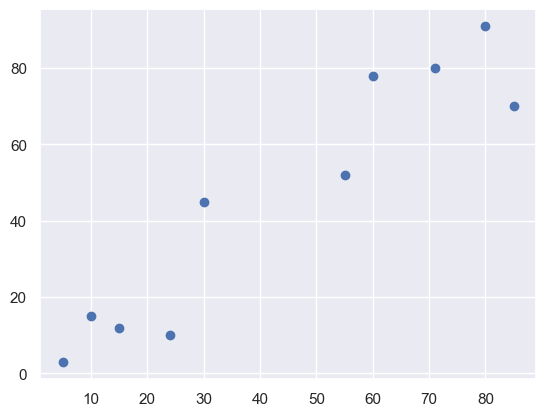

In [14]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import pandas as pd
sns.set()

X = np.array([[5, 3], [10, 15], [15, 12], [24, 10], [30, 45], [85, 70], [71, 80], [60, 78], [55, 52], [80, 91], ])
plt.scatter(X[:,0], X[:,1])
plt.show()

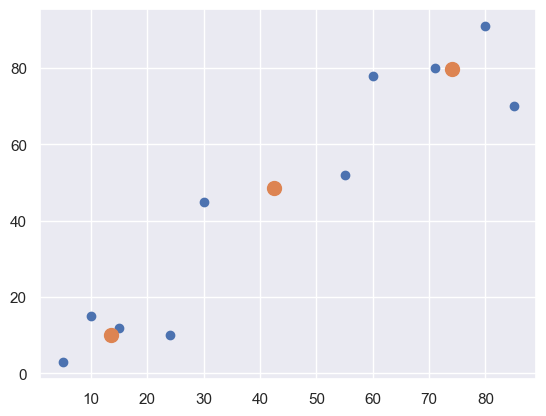

In [15]:
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_
plt.scatter(X[:,0], X[:,1])
plt.scatter(centers[:, 0], centers[:, 1], s=100)
plt.show()

## Задание
Выполните кластеризацию для набора данных ирисов Фишера. Выполните
предсказания для модели. Поэкспериментируйте с количеством кластеров.

In [16]:
dataframe = sns.load_dataset('iris')
dataframe

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [24]:
dataframe.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [37]:
species_mapper = {
    "setosa": 0,
    "versicolor": 1,
    "virginica": 2
}
dataframe = dataframe.replace(species_mapper)
dataframe

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [40]:
kmeans = KMeans(n_clusters=3, random_state=0)
cluster = kmeans.fit_predict(dataframe)
centers = kmeans.cluster_centers_
centers

array([[5.91568627, 2.76470588, 4.26470588, 1.33333333, 1.01960784],
       [5.006     , 3.428     , 1.462     , 0.246     , 0.        ],
       [6.62244898, 2.98367347, 5.57346939, 2.03265306, 2.        ]])

## Задание
Выполните иерархическую кластеризацию для набора данных об
ирисах Фишера. При этом необходимо использовать любые два признака
(всего их четыре).

In [48]:
dataframe = sns.load_dataset('iris').iloc[:,-3:]
dataframe = dataframe.replace(species_mapper)
dataframe

,petal_length,petal_width,species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


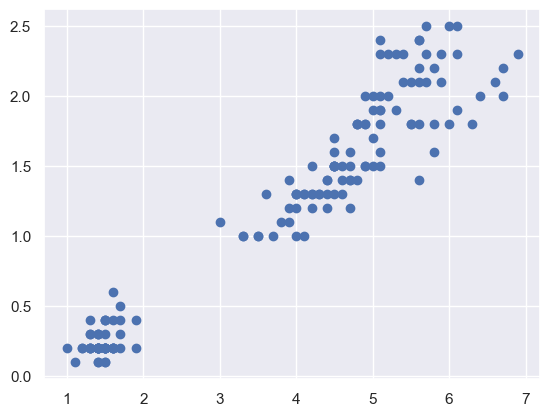

In [51]:
plt.scatter(dataframe.iloc[:,-3], dataframe.iloc[:,-2])
plt.show()

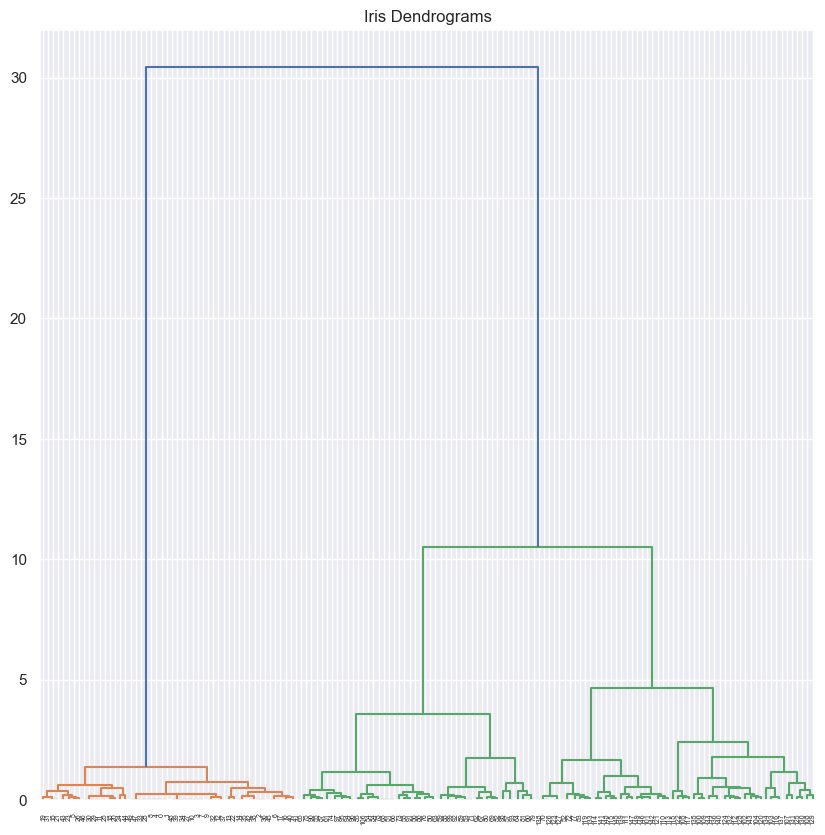

In [56]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(10, 10))
plt.title('Iris Dendrograms')
dend = dendrogram(linkage(dataframe.iloc[:,:-1], method='ward'))

In [59]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(dataframe.iloc[:,:-1])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

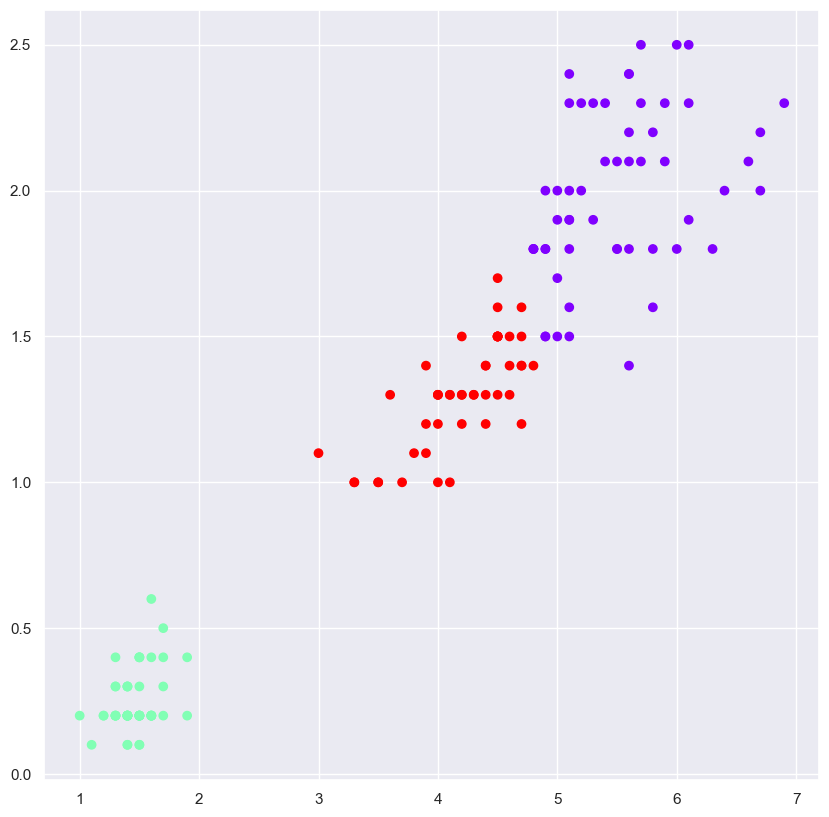

In [62]:
plt.figure(figsize=(10,10))
plt.scatter(dataframe.iloc[:,0], dataframe.iloc[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()